In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
# import the data
ins_data = pd.read_csv("insurance.csv")
ins_data.shape

(1338, 7)

<IPython.core.display.Javascript object>

In [4]:
# explore the data's statistics
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<IPython.core.display.Javascript object>

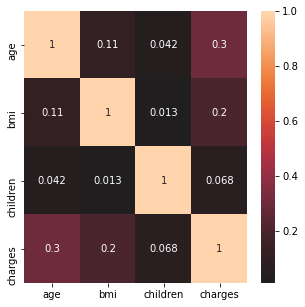

<IPython.core.display.Javascript object>

In [5]:
# display a heatmap using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(ins_data.corr(), annot=True, center=0.0)

After looking at the data, I ran a quick correlation matrix (heatmap).

There were no strong correlations but there were some weak correlations between charges vs. BMI and charges vs. age.

So I decided to look a little further

BMI Mean: 30.663396860986538
DescribeResult(nobs=1338, minmax=(15.96, 53.13), mean=30.66339686098655, variance=37.18788360977323, skewness=0.28372857291709386, kurtosis=-0.05502310583700032)


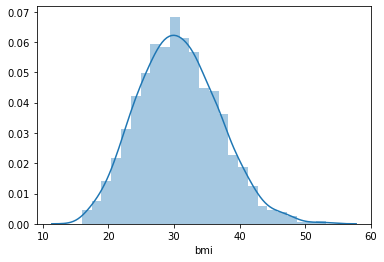

<IPython.core.display.Javascript object>

In [6]:
# visualize the bmi distributions using seaborn
sns.distplot(ins_data.bmi)
print("BMI Mean:", ins_data.bmi.mean())
print(stats.describe(ins_data.bmi))

As far as the data for bmi, the distribution is normal


Charges Mean: 13270.422265141257
Charges Median: 9382.033
DescribeResult(nobs=1338, minmax=(1121.8739, 63770.42801), mean=13270.422265141257, variance=146652372.15285498, skewness=1.5141797118745743, kurtosis=1.595821363956751)


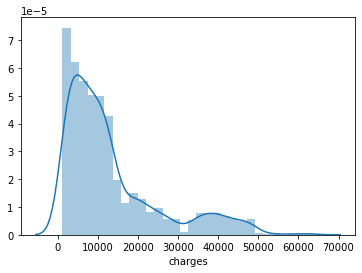

<IPython.core.display.Javascript object>

In [7]:
# visualize the charges distribution using seaborn
sns.distplot(ins_data.charges)
print("Charges Mean:", ins_data.charges.mean())
print("Charges Median:", ins_data.charges.median())
print(stats.describe(ins_data.charges))

I decided to look at the distribution for the charges column as well.

This one was not normal. However, I wanted to see who were the people getting charged the most

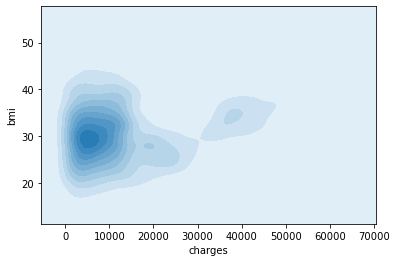

<IPython.core.display.Javascript object>

In [8]:
# visualize the density of the charges column using seaborn
sns.kdeplot(ins_data.charges, ins_data.bmi, shade=True)
plt.show()

This density plot looks at the relationship between charges and BMI. It appears as if most people who have a BMI of about 30 are getting charged somewhere around 7-8 thousand dollars


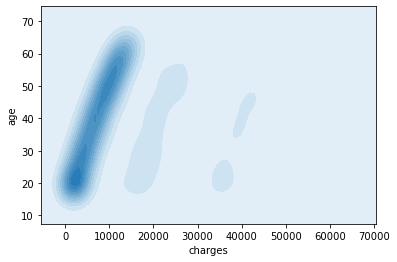

<IPython.core.display.Javascript object>

In [9]:
sns.kdeplot(ins_data.charges, ins_data.age, shade=True)
plt.show()

When the I looked at a density plot of charges vs. age, we can quickly see that the bulk of the charges appear to be within $0 to $10,000

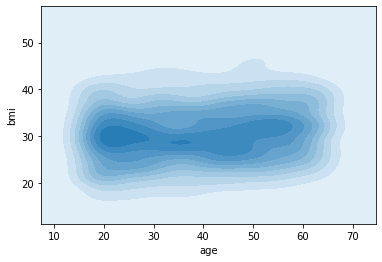

<IPython.core.display.Javascript object>

In [10]:
sns.kdeplot(ins_data.age, ins_data.bmi, shade=True)
plt.show()

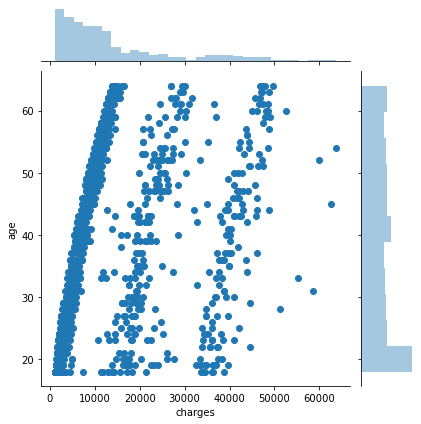

<IPython.core.display.Javascript object>

In [11]:
sns.jointplot(x="charges", y="age", data=ins_data)

Another view of charges vs. age

In [12]:
ins_data.index

RangeIndex(start=0, stop=1338, step=1)

<IPython.core.display.Javascript object>

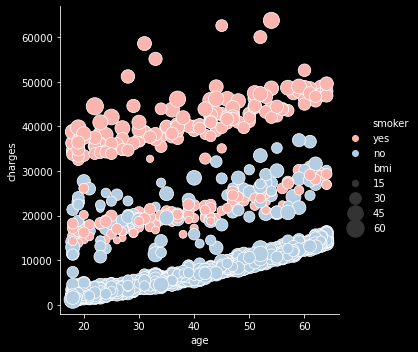

<IPython.core.display.Javascript object>

In [13]:
# visualize charges according to smoker vs. non-smoker (dot color) and BMI (dot size)
plt.style.use("dark_background")
sns.relplot(
    x="age",
    y="charges",
    hue="smoker",
    size="bmi",
    sizes=(40, 300),
    data=ins_data,
    palette="Pastel1",
)
plt.show()

Based on this relplot, It appears as if smokers on average, pay more money for treatment than non-smokers.

It looks like BMI might have some effect on sharges as well. I will explore this at a later time

In [14]:
# I decided to split the data into different ways to explore further. I started by splitting the data into smokers
# and non-smokers.
smoker = ins_data[ins_data["smoker"] == "yes"]
non_smoker = ins_data[ins_data["smoker"] == "no"]

<IPython.core.display.Javascript object>

In [15]:
# look at the first two rows of smoker data
smoker.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251


<IPython.core.display.Javascript object>

In [16]:
# look at the number of rows and columns
smoker.shape

(274, 7)

<IPython.core.display.Javascript object>

In [17]:
# look at the stats
smoker.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


<IPython.core.display.Javascript object>

In [18]:
# count the nulls
smoker.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
# look at the first two rows of non-smoker data
non_smoker.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


<IPython.core.display.Javascript object>

In [20]:
non_smoker.shape

(1064, 7)

<IPython.core.display.Javascript object>

In [21]:
# look at the stats
non_smoker.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


<IPython.core.display.Javascript object>

In [22]:
# count the nulls
non_smoker.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<IPython.core.display.Javascript object>

In [23]:
# select only 
smoker.drop(["sex", "children", "smoker", "region"], axis=1, inplace=True)

/Users/oscarsuarez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<IPython.core.display.Javascript object>

In [24]:
non_smoker.drop(["sex", "children", "smoker", "region"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

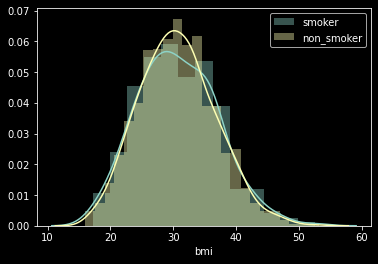

<IPython.core.display.Javascript object>

In [29]:
# I appears as if the BMIs for smokers and non-smokers are similar
sns.distplot(smoker.bmi)
sns.distplot(non_smoker.bmi)
plt.legend(("smoker", "non_smoker"))

In [30]:
smoker.mean()

age           38.514599
bmi           30.708449
charges    32050.231832
dtype: float64

<IPython.core.display.Javascript object>

In [31]:
non_smoker.mean()

age          39.385338
bmi          30.651795
charges    8434.268298
dtype: float64

<IPython.core.display.Javascript object>

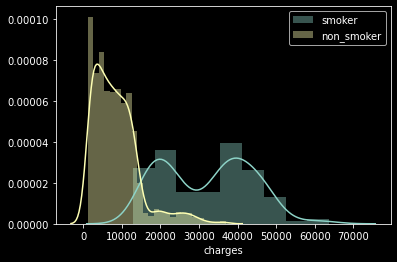

<IPython.core.display.Javascript object>

In [32]:
# based on the following histogram, there appears to be a difference in the means of charges for smokers and non-smokers
# I will run a t-test
sns.distplot(smoker.charges)
sns.distplot(non_smoker.charges)
plt.legend(("smoker", "non_smoker"))

In [33]:
# after looking at the means of the values for smokers vs non-smokers, I decided to run a t-test.
# There seems to be no significant difference between the means for BMI or age with p-values of more than 0.05.
# However, for the means of charges, the t-test calculated a p-value less than 0.05,
# meaning that there is a significant difference between the means of charges of smokers and non-smokers
for column in smoker.columns:
    print(f"t-test for {column}:", stats.ttest_ind(smoker[column], non_smoker[column]))

t-test for age: Ttest_indResult(statistic=-0.9147550725477458, pvalue=0.36048529037840416)
t-test for bmi: Ttest_indResult(statistic=0.13708403310827058, pvalue=0.8909850280013041)
t-test for charges: Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)


<IPython.core.display.Javascript object>

In [34]:
print(stats.describe(smoker.charges))
print(stats.describe(non_smoker.charges))

DescribeResult(nobs=274, minmax=(12829.4551, 63770.42801), mean=32050.23183153284, variance=133207311.20634924, skewness=0.127514285857385, kurtosis=-1.0395337984245219)
DescribeResult(nobs=1064, minmax=(1121.8739, 36910.60803), mean=8434.268297856204, variance=35925420.49611173, skewness=1.5359507841880067, kurtosis=3.1288070753114896)


<IPython.core.display.Javascript object>

# The following plots are exploratory. Some of them will be included in the presentation, some of them will not.

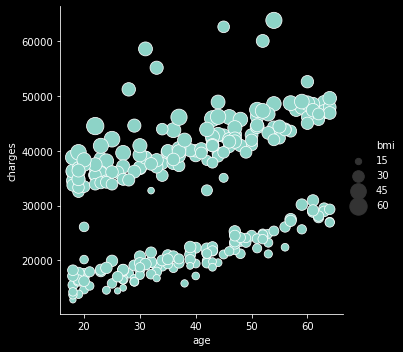

<IPython.core.display.Javascript object>

In [35]:
plt.style.use("dark_background")
ax = sns.relplot(
    x="age", y="charges", size="bmi", sizes=(40, 300), data=smoker, palette="Pastel1"
)
plt.savefig("smoker_charges_vs_age")

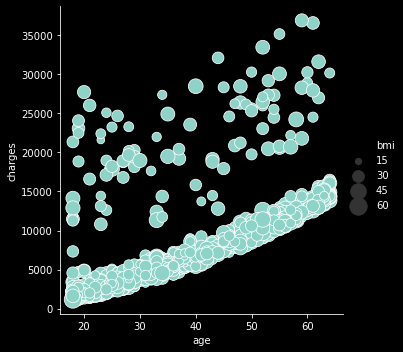

<IPython.core.display.Javascript object>

In [36]:
sns.relplot(
    x="age",
    y="charges",
    size="bmi",
    sizes=(40, 300),
    data=non_smoker,
    palette="Pastel2",
)
plt.savefig("non_smoker_charges_vs_age")

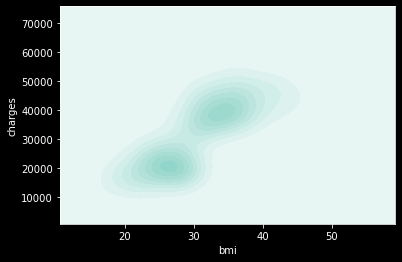

<IPython.core.display.Javascript object>

In [37]:
sns.kdeplot(smoker.bmi, smoker.charges, shade=True)

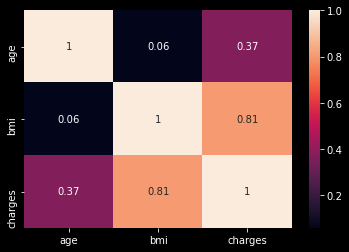

<IPython.core.display.Javascript object>

In [38]:
sns.heatmap(smoker.corr(), annot=True)

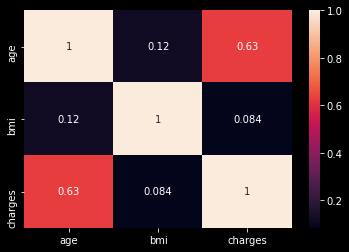

<IPython.core.display.Javascript object>

In [39]:
sns.heatmap(non_smoker.corr(), annot=True)

In [40]:
def mean_sampler(aList):
    sampleMeans = []
    for _ in range(10000):
        samples = aList.sample(n=100)
        sampleMean = np.mean(samples)
        sampleMeans.append(sampleMean)
    return sampleMeans

<IPython.core.display.Javascript object>

In [41]:
smokers_sampleMeans = mean_sampler(smoker.charges)
non_smokers_sampleMeans = mean_sampler(non_smoker.charges)

<IPython.core.display.Javascript object>

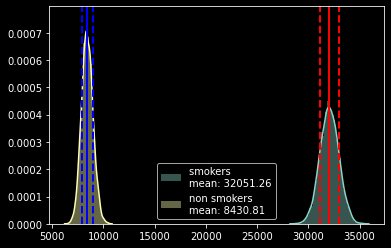

<IPython.core.display.Javascript object>

In [42]:
sns.distplot(smokers_sampleMeans)
sns.distplot(non_smokers_sampleMeans)
plt.legend(
    (
        f"smokers \nmean: {round(np.mean(smokers_sampleMeans),2)}",
        f"non smokers \nmean: {round(np.mean(non_smokers_sampleMeans),2)}",
    )
)
plt.axvline(np.mean(smokers_sampleMeans), color="r", linestyle="solid", linewidth=2)
plt.axvline(
    np.mean(smokers_sampleMeans) + np.std(smokers_sampleMeans),
    color="r",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    np.mean(smokers_sampleMeans) - np.std(smokers_sampleMeans),
    color="r",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(np.mean(non_smokers_sampleMeans), color="b", linestyle="solid", linewidth=2)
plt.axvline(
    np.mean(non_smokers_sampleMeans) + np.std(non_smokers_sampleMeans),
    color="b",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    np.mean(non_smokers_sampleMeans) - np.std(non_smokers_sampleMeans),
    color="b",
    linestyle="dashed",
    linewidth=2,
)
plt.show()